# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Install citipy to look for the nearest city with geo coordinates
!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding latitude, longitudes and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [114]:
# Set url for API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Test for one city
test_city = "Madgaon"

# Build the query URL
test_url = base_url + "appid=" + weather_api_key + "&q=" + test_city
print(test_url)

# Get weather data
test_json = requests.get(test_url).json()

# Print the weather data for the test city to discover all available fields
print (json.dumps(test_json, indent=4, sort_keys=True))
# print (cities)

http://api.openweathermap.org/data/2.5/weather?appid=a40a69c36b0886d82e86a271f94a8db0&q=Madgaon
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 15.3,
        "lon": 73.95
    },
    "dt": 1592688043,
    "id": 1264588,
    "main": {
        "feels_like": 304.22,
        "grnd_level": 1006,
        "humidity": 86,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 299.37,
        "temp_max": 299.37,
        "temp_min": 299.37
    },
    "name": "Madgaon",
    "rain": {
        "1h": 0.49
    },
    "sys": {
        "country": "IN",
        "sunrise": 1592699697,
        "sunset": 1592746621
    },
    "timezone": 19800,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 209,
        "speed": 1.12
    }
}


In [115]:
# Create empty lists to collect and store the corresponding raw data using a series of successive API calls
city_data = []
        
# Set a counter to print the requested results with record number
record_number = 1
        
# Loop through each city
for city in cities:
    
    # Create search query, make request and store in json
    units = "Imperial"
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_json = requests.get(query_url).json()
    
    # Collect the raw data values if they are available in the Open Weather Map API
    try:
        latitude = (weather_json['coord']['lat'])
        longitude = (weather_json['coord']['lon'])
        temperature = (weather_json['main']['temp'])
        humidity = (weather_json['main']['humidity'])        
        wind_speed = (weather_json['wind']['speed'])
        cloudiness = (weather_json['clouds']['all'])
        date = (weather_json['dt'])
        country = (weather_json['sys']['country'])
        city_name = (weather_json['name'])

        city_data.append({
            "City": city_name,
            "Country": country,
            "Latitude": latitude,
            "Longitude": longitude,
            "Temperature": temperature,
            "Humidity": humidity,
            "Wind speed": wind_speed,
            "Cloudiness": cloudiness,
            "Date": date            
        })
        
        print (f"Processing record {record_number} of Set 1 | {city}")

    # Handle exceptions for a city that is not available in the Open Weather Map API
    except:
        # Append null values
        print(f"Processing record {record_number} of Set 1 | {city} not found. Skipping...")
        pass
    record_number += 1
    
print("Great job! All raw data has now been collected")

Processing record 1 of Set 1 | hermanus
Processing record 2 of Set 1 | ushuaia
Processing record 3 of Set 1 | omboue
Processing record 4 of Set 1 | el alto
Processing record 5 of Set 1 | bluff
Processing record 6 of Set 1 | bridgetown
Processing record 7 of Set 1 | wadi maliz
Processing record 8 of Set 1 | yangambi
Processing record 9 of Set 1 | camacha
Processing record 10 of Set 1 | vostok
Processing record 11 of Set 1 | pervomayskiy
Processing record 12 of Set 1 | baculin
Processing record 13 of Set 1 | visnes
Processing record 14 of Set 1 | obihiro
Processing record 15 of Set 1 | boa vista
Processing record 16 of Set 1 | taolanaro not found. Skipping...
Processing record 17 of Set 1 | torbay
Processing record 18 of Set 1 | luderitz
Processing record 19 of Set 1 | albany
Processing record 20 of Set 1 | dikson
Processing record 21 of Set 1 | grand river south east not found. Skipping...
Processing record 22 of Set 1 | rawson
Processing record 23 of Set 1 | butaritari
Processing recor

Processing record 188 of Set 1 | coihaique
Processing record 189 of Set 1 | grindavik
Processing record 190 of Set 1 | kondinskoye
Processing record 191 of Set 1 | upernavik
Processing record 192 of Set 1 | mahibadhoo
Processing record 193 of Set 1 | samalaeulu not found. Skipping...
Processing record 194 of Set 1 | port elizabeth
Processing record 195 of Set 1 | fairbanks
Processing record 196 of Set 1 | melbu
Processing record 197 of Set 1 | iralaya
Processing record 198 of Set 1 | wuwei
Processing record 199 of Set 1 | nizwa
Processing record 200 of Set 1 | sitka
Processing record 201 of Set 1 | tazovskiy
Processing record 202 of Set 1 | mehamn
Processing record 203 of Set 1 | bembereke
Processing record 204 of Set 1 | griffith
Processing record 205 of Set 1 | puerto ayora
Processing record 206 of Set 1 | ketchikan
Processing record 207 of Set 1 | port hardy
Processing record 208 of Set 1 | tsihombe not found. Skipping...
Processing record 209 of Set 1 | coquimbo
Processing record 2

Processing record 376 of Set 1 | bonanza
Processing record 377 of Set 1 | umm durman not found. Skipping...
Processing record 378 of Set 1 | poum
Processing record 379 of Set 1 | cam ranh
Processing record 380 of Set 1 | kerteh not found. Skipping...
Processing record 381 of Set 1 | sinnamary
Processing record 382 of Set 1 | sataua not found. Skipping...
Processing record 383 of Set 1 | ponta do sol
Processing record 384 of Set 1 | rugby
Processing record 385 of Set 1 | den helder
Processing record 386 of Set 1 | yithion not found. Skipping...
Processing record 387 of Set 1 | nanfeng
Processing record 388 of Set 1 | tolmezzo
Processing record 389 of Set 1 | vilyuysk
Processing record 390 of Set 1 | gawler
Processing record 391 of Set 1 | karakendzha not found. Skipping...
Processing record 392 of Set 1 | moerai
Processing record 393 of Set 1 | beira
Processing record 394 of Set 1 | lahij
Processing record 395 of Set 1 | botad
Processing record 396 of Set 1 | capelinha
Processing record

Processing record 558 of Set 1 | fairlie
Processing record 559 of Set 1 | takoradi
Processing record 560 of Set 1 | brora
Processing record 561 of Set 1 | bilma
Processing record 562 of Set 1 | san cristobal
Processing record 563 of Set 1 | tongchuan
Processing record 564 of Set 1 | byron bay
Processing record 565 of Set 1 | twin falls
Processing record 566 of Set 1 | malanje
Processing record 567 of Set 1 | san julian
Processing record 568 of Set 1 | garissa
Processing record 569 of Set 1 | souillac
Processing record 570 of Set 1 | thunder bay
Processing record 571 of Set 1 | jizan
Processing record 572 of Set 1 | kajaani
Processing record 573 of Set 1 | teknaf
Processing record 574 of Set 1 | cururupu
Processing record 575 of Set 1 | tyukhtet
Processing record 576 of Set 1 | kyra
Processing record 577 of Set 1 | kantabanji
Processing record 578 of Set 1 | pandelys not found. Skipping...
Processing record 579 of Set 1 | rio tercero
Processing record 580 of Set 1 | miandrivazo
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [116]:
# Create a DataFrame
city_data_df = pd.DataFrame(city_data)

# Create the path to export the DataFrame into a .csv file
output_path = "../output_data/city_data.csv"
city_data_df.to_csv(output_path, index=False, encoding="utf-8")

# Display the DataFrame
city_data_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudiness,Date
0,Hermanus,ZA,-34.42,19.23,54.00,96,1.01,65,1592688066
1,Ushuaia,AR,-54.80,-68.30,37.40,89,7.40,88,1592687942
2,Omboué,GA,-1.57,9.26,74.32,90,9.13,98,1592688066
3,El Alto,PE,-4.27,-81.21,68.92,74,14.52,9,1592687915
4,Bluff,NZ,-46.60,168.33,39.00,83,3.00,19,1592688067


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [127]:
# Import date to include the date of analysis
from datetime import date

# Define a function for scatter plot
def scatter_plot(city_data_df, x_axis, y_axis):

    plt.scatter(city_data_df[x_axis],city_data_df[y_axis], marker="o", color='C0', linewidths=0.4, edgecolors="black")
    today = date.today()
    plt.title(x_axis + " " + "vs. " + y_axis + " as on " + str(today))
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    fig = plt.figure(figsize=(7,4))
    plt.tight_layout()
    plt.show()
    output_plot = "../output_data/"+ x_axis + " " + "vs " + y_axis + " as on " + str(today) + ".png"
    plt.savefig(output_plot, dpi=470, bbox_inches='tight')

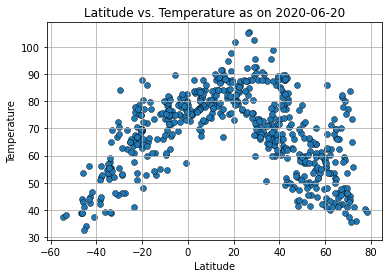

<Figure size 504x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [128]:
# Generate a scatter plot for Latitude vs. Temperature
x_axis = "Latitude"
y_axis = "Temperature"
scatter_plot(city_data_df, x_axis, y_axis)

#### Latitude vs. Humidity Plot

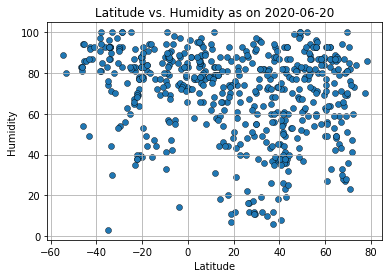

<Figure size 504x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [129]:
# Generate a scatter plot for Latitude vs. Humidity
x_axis = "Latitude"
y_axis = "Humidity"
scatter_plot(city_data_df, x_axis, y_axis)

#### Latitude vs. Cloudiness Plot

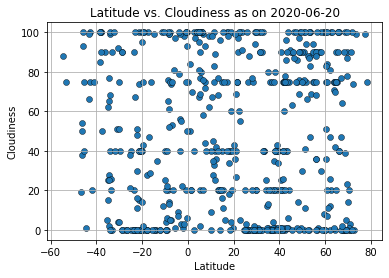

<Figure size 504x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [130]:
# Generate a scatter plot for Latitude vs. Cloudiness
x_axis = "Latitude"
y_axis = "Cloudiness"
scatter_plot(city_data_df, x_axis, y_axis)

#### Latitude vs. Wind Speed Plot

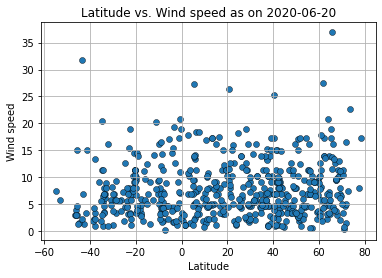

<Figure size 504x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [131]:
# Generate a scatter plot for Latitude vs. Wind Speed
x_axis = "Latitude"
y_axis = "Wind speed"
scatter_plot(city_data_df, x_axis, y_axis)

## Linear Regression

In [132]:
# OPTIONAL: Create a function to create Linear Regression plots

In [133]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

northern_hemisphere_df = city_data_df.loc[city_data_df["Latitude"]>=0]

southern_hemisphere_df = city_data_df.loc[city_data_df["Latitude"]<0]

# Check that all cities have been captures in either of the hemisphere DataFrames
print(f" Total count of cities in the City data DataFrame is {len(city_data_df)}")
print(f" Total count of cities in the Northern Hemisphere DataFrame is {len(northern_hemisphere_df)}")
print(f" Total count of cities in the Southern Hemisphere DataFrame is {len(southern_hemisphere_df)}")

 Total count of cities in the City data DataFrame is 559
 Total count of cities in the Northern Hemisphere DataFrame is 385
 Total count of cities in the Southern Hemisphere DataFrame is 174


In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
def scatter_plot_by_hemisphere(city_data_df, x_axis, y_axis):

    plt.scatter(city_data_df[x_axis],city_data_df[y_axis], marker="o", color='C0', linewidths=0.4, edgecolors="black")
    today = date.today()
    plt.title(x_axis + " " + "vs. " + y_axis + " as on " + str(today))
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)

    # Calculate and plot the regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(city_data_df[x_axis], city_data_df[y_axis])
    regress_values = city_data_df[x_axis] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(city_data_df[x_axis],regress_values,"r-")
    
    fig = plt.figure(figsize=(7,4))
    plt.tight_layout()
    plt.show()
    
    plt.annotate(line_eq,(5,33),fontsize=14,color="red")
    output_plot = "../output_data/"+ x_axis + " " + "vs " + y_axis + " as on " + str(today) + ".png"
    plt.savefig(output_plot, dpi=300,bbox_inches='tight')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

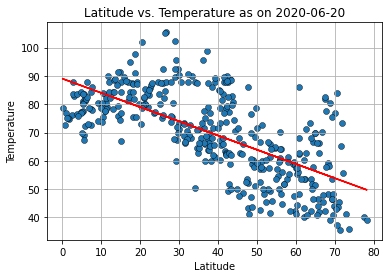

<Figure size 504x288 with 0 Axes>

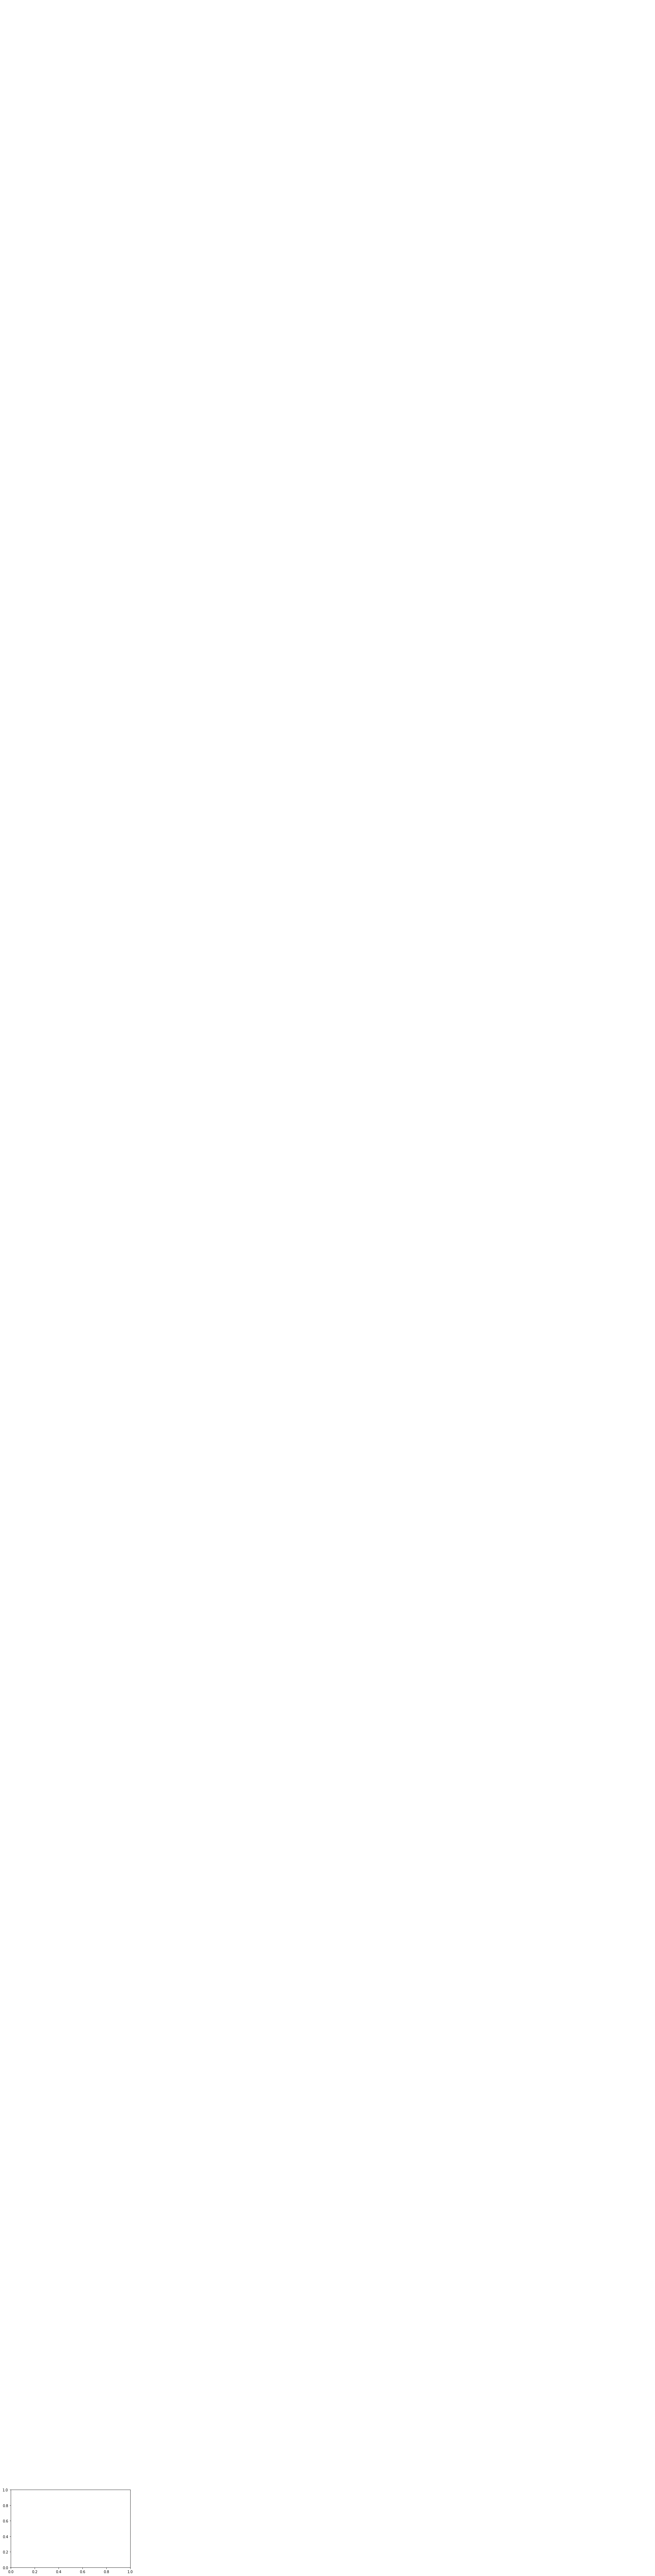

In [151]:
x_axis = "Latitude"
y_axis = "Temperature"
scatter_plot_by_hemisphere(northern_hemisphere_df, x_axis, y_axis)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

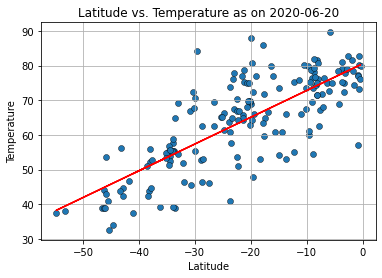

<Figure size 504x288 with 0 Axes>

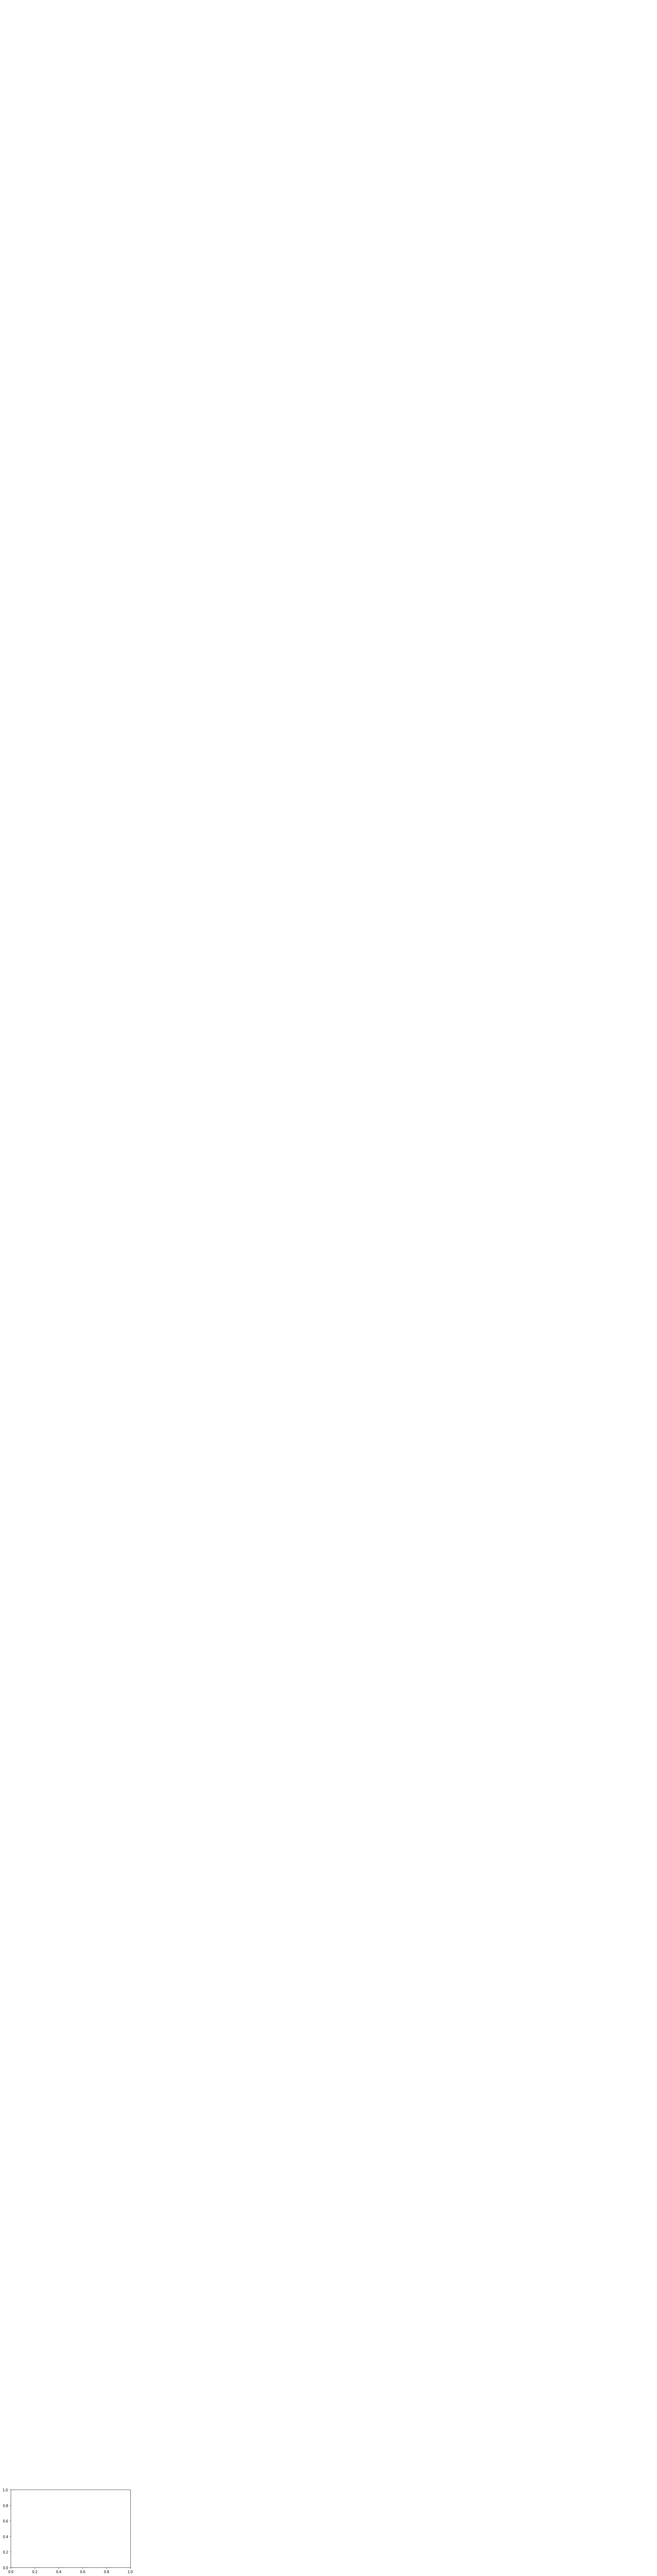

In [152]:
x_axis = "Latitude"
y_axis = "Temperature"
scatter_plot_by_hemisphere(southern_hemisphere_df, x_axis, y_axis)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

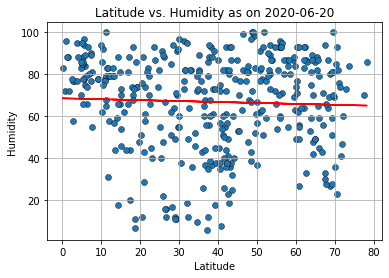

<Figure size 504x288 with 0 Axes>

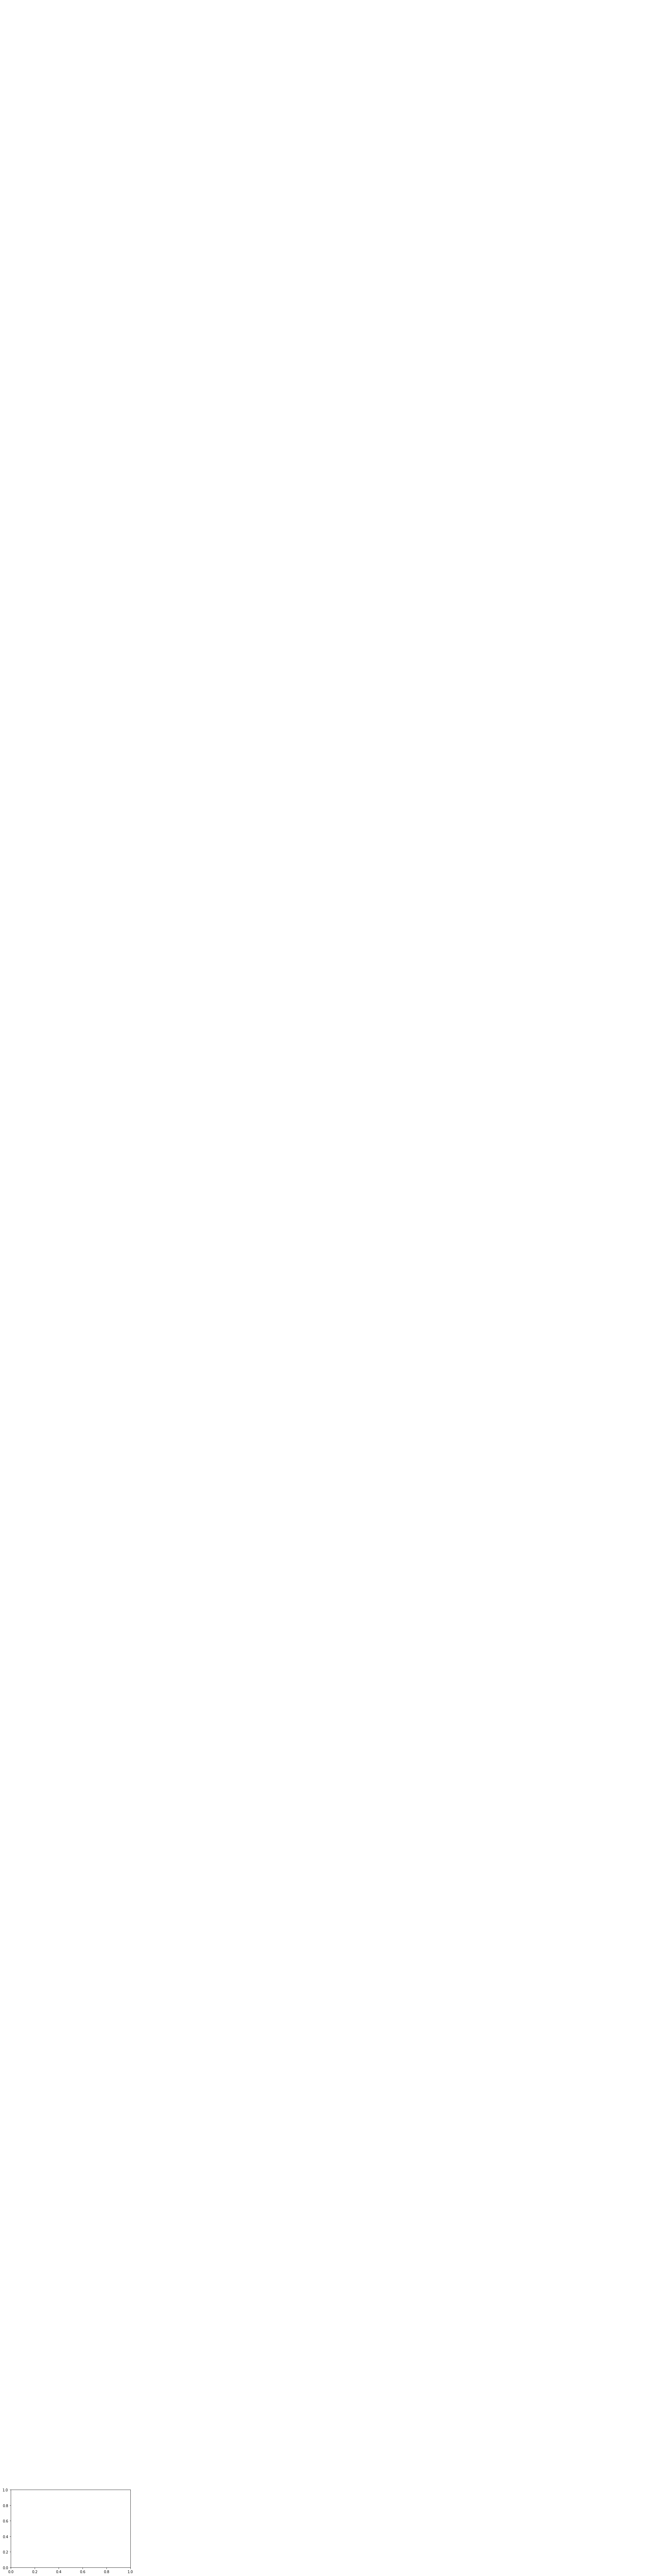

In [153]:
x_axis = "Latitude"
y_axis = "Humidity"
scatter_plot_by_hemisphere(northern_hemisphere_df, x_axis, y_axis)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

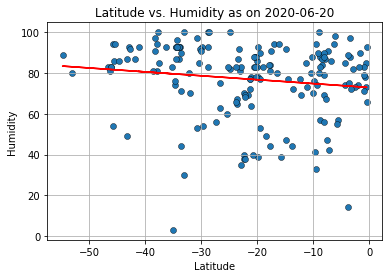

<Figure size 504x288 with 0 Axes>

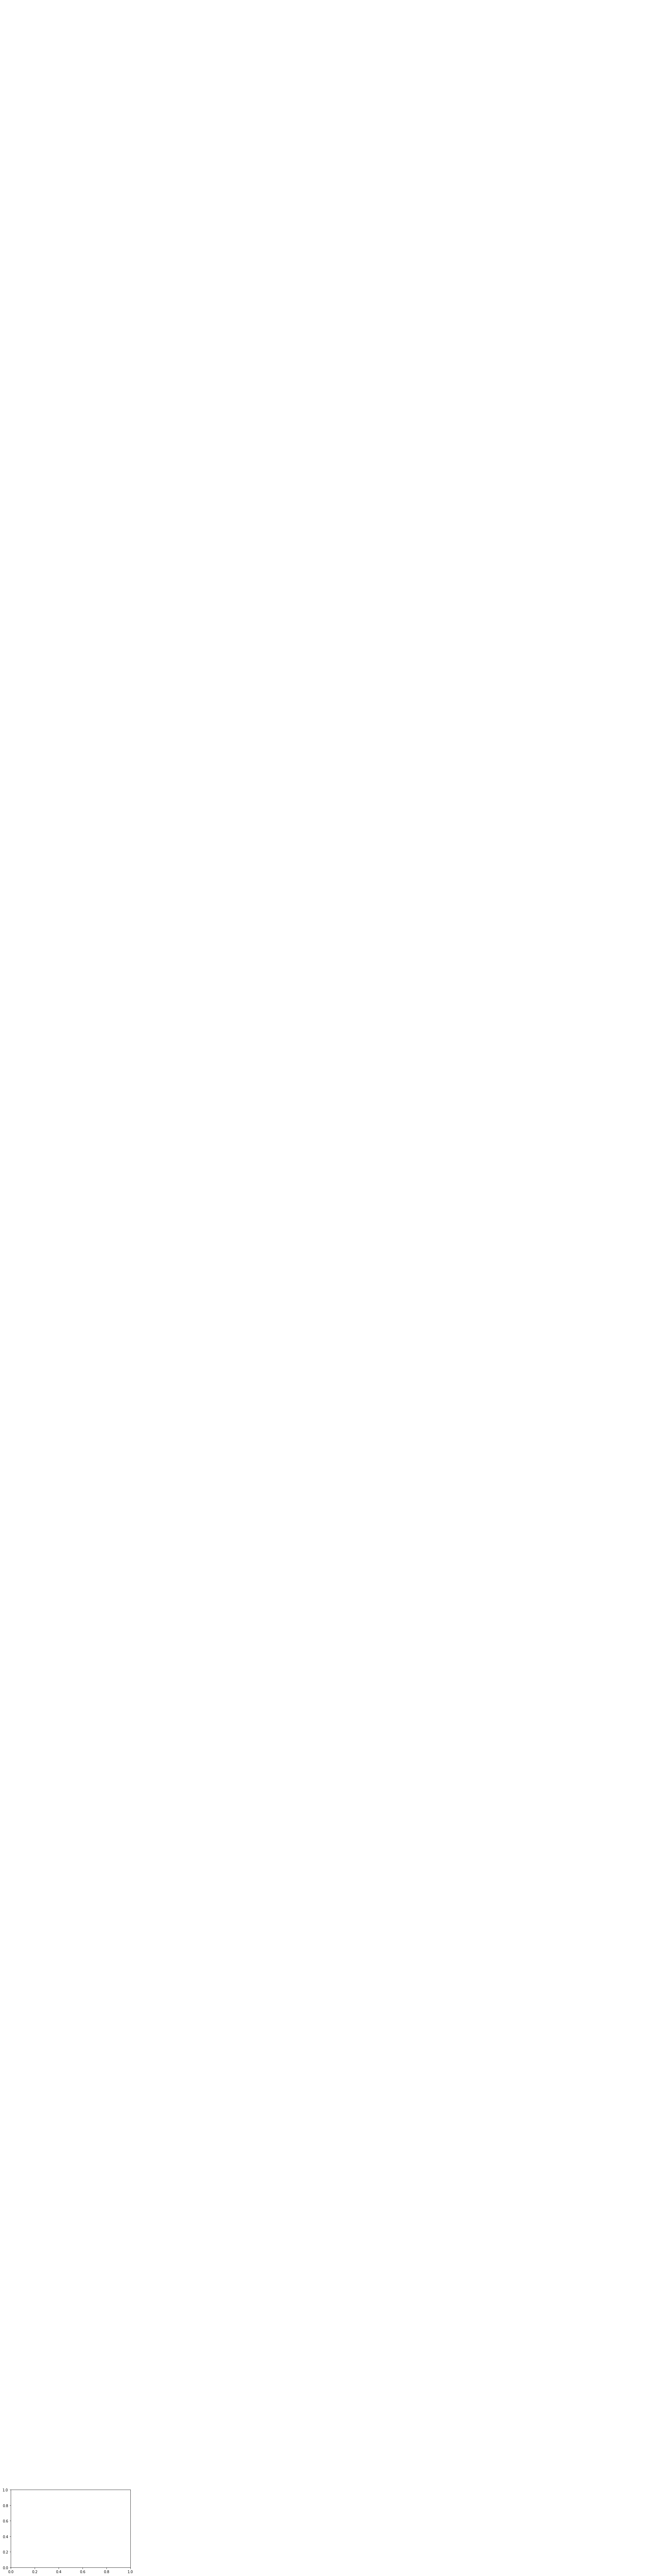

In [154]:
x_axis = "Latitude"
y_axis = "Humidity"
scatter_plot_by_hemisphere(southern_hemisphere_df, x_axis, y_axis)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

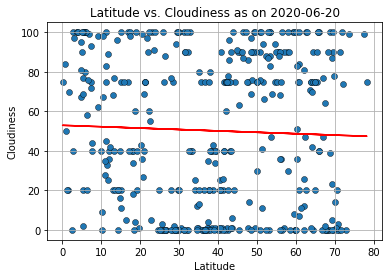

<Figure size 504x288 with 0 Axes>

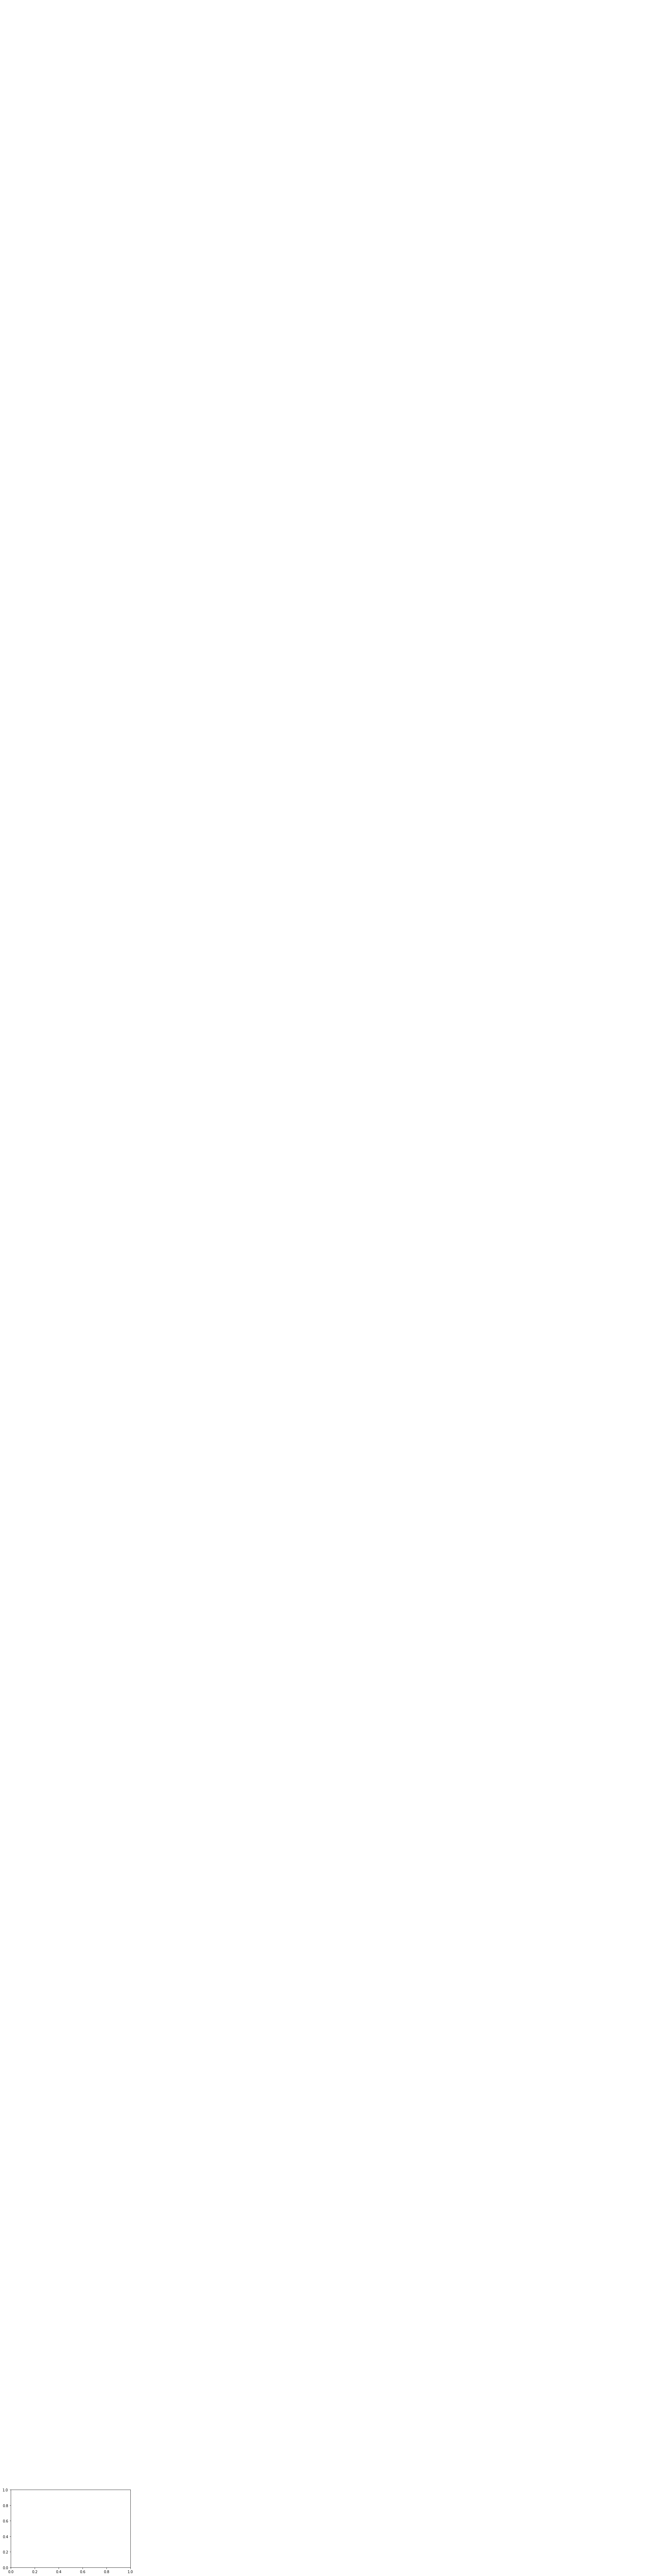

In [155]:
x_axis = "Latitude"
y_axis = "Cloudiness"
scatter_plot_by_hemisphere(northern_hemisphere_df, x_axis, y_axis)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

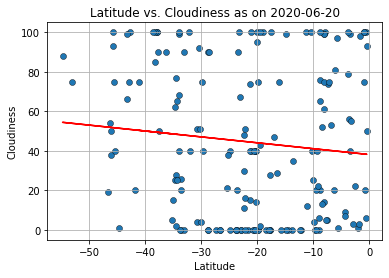

<Figure size 504x288 with 0 Axes>

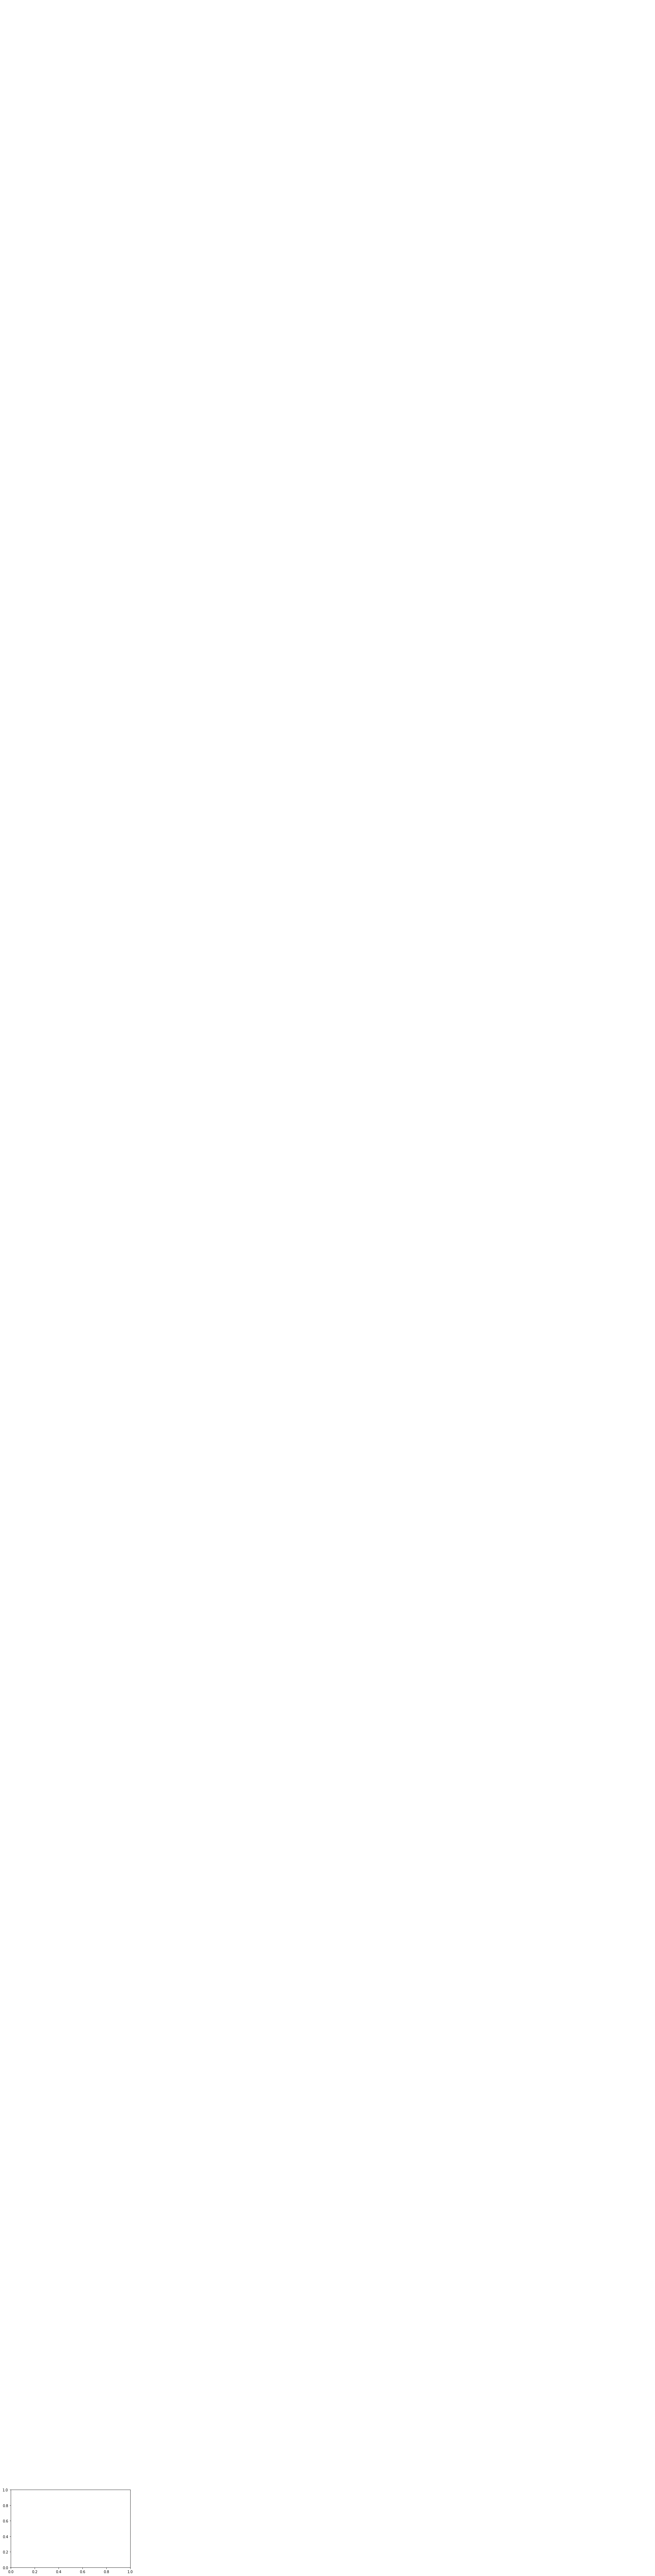

In [156]:
x_axis = "Latitude"
y_axis = "Cloudiness"
scatter_plot_by_hemisphere(southern_hemisphere_df, x_axis, y_axis)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

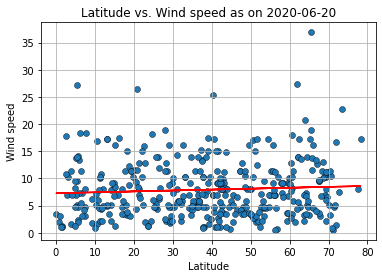

<Figure size 504x288 with 0 Axes>

SystemError: <built-in method write of _io.BufferedWriter object at 0x0000022A9DB9ECA8> returned a result with an error set

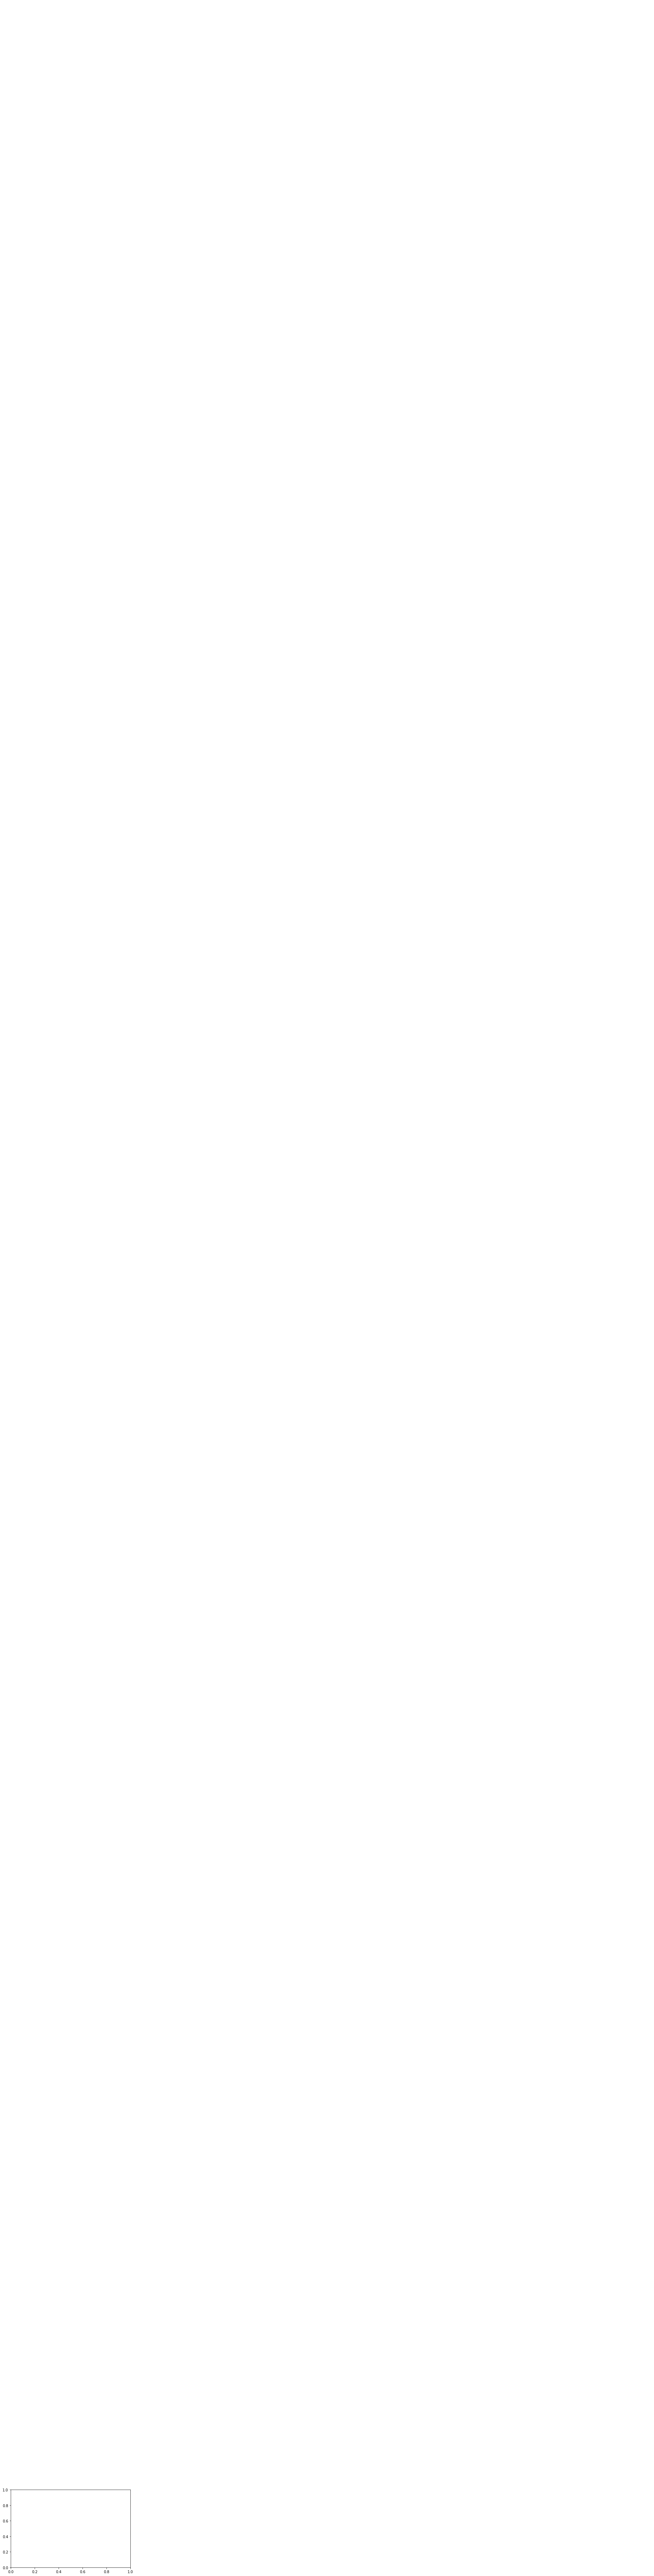

In [157]:
x_axis = "Latitude"
y_axis = "Wind speed"
scatter_plot_by_hemisphere(northern_hemisphere_df, x_axis, y_axis)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_axis = "Latitude"
y_axis = "Wind speed"
scatter_plot_by_hemisphere(southern_hemisphere_df, x_axis, y_axis)